# Neural Network - Image Categorization
Use Neural Network to identify which data belongs to which category</br>
The data is domain is unknown

## Pretrain procedure

### Import data

In [1]:
import numpy as np

# Load data
with open('data.npy', 'rb') as f:
    data = np.load(f, allow_pickle=True).item()
    X = data['image']
    y = data['label']

### Understanding data

#### General idea of the data

In [2]:
image_array = X
label_array = y

number_of_images = image_array.shape[0]
number_of_colors_representations = image_array.shape[1]
number_of_dimension_per_image_length = image_array.shape[2]
number_of_dimension_per_image_width = image_array.shape[3]

print(image_array.shape)
print(f'There are {image_array.shape[0]} images in the dataset.')
print(f'Each image is represented in {image_array.shape[1]} colours.')
print(f'Each image has dimension of {image_array.shape[2]} * {image_array.shape[3]} with {image_array.shape[1]} colours.')

print("image_array[image_id][RGB][width/row][height/column]")
print(f"image_id     : {image_array.shape[0]} images")
print(f"RGB          : {image_array.shape[1]} colours")
print(f"width/row    : {image_array.shape[2]} pixel values of that certain row")
print(f"height/column: the pixel value of that column for that row")



(2911, 3, 16, 16)
There are 2911 images in the dataset.
Each image is represented in 3 colours.
Each image has dimension of 16 * 16 with 3 colours.
image_array[image_id][RGB][width/row][height/column]
image_id     : 2911 images
RGB          : 3 colours
width/row    : 16 pixel values of that certain row
height/column: the pixel value of that column for that row


#### Understanding and visualizing the images in the dataset

C:\Users\Ho Jin Han\AppData\Local\Temp\ipykernel_21368\2773424272.py:17: RuntimeWarning: invalid value encountered in cast
  int_image = image.astype(np.uint8)


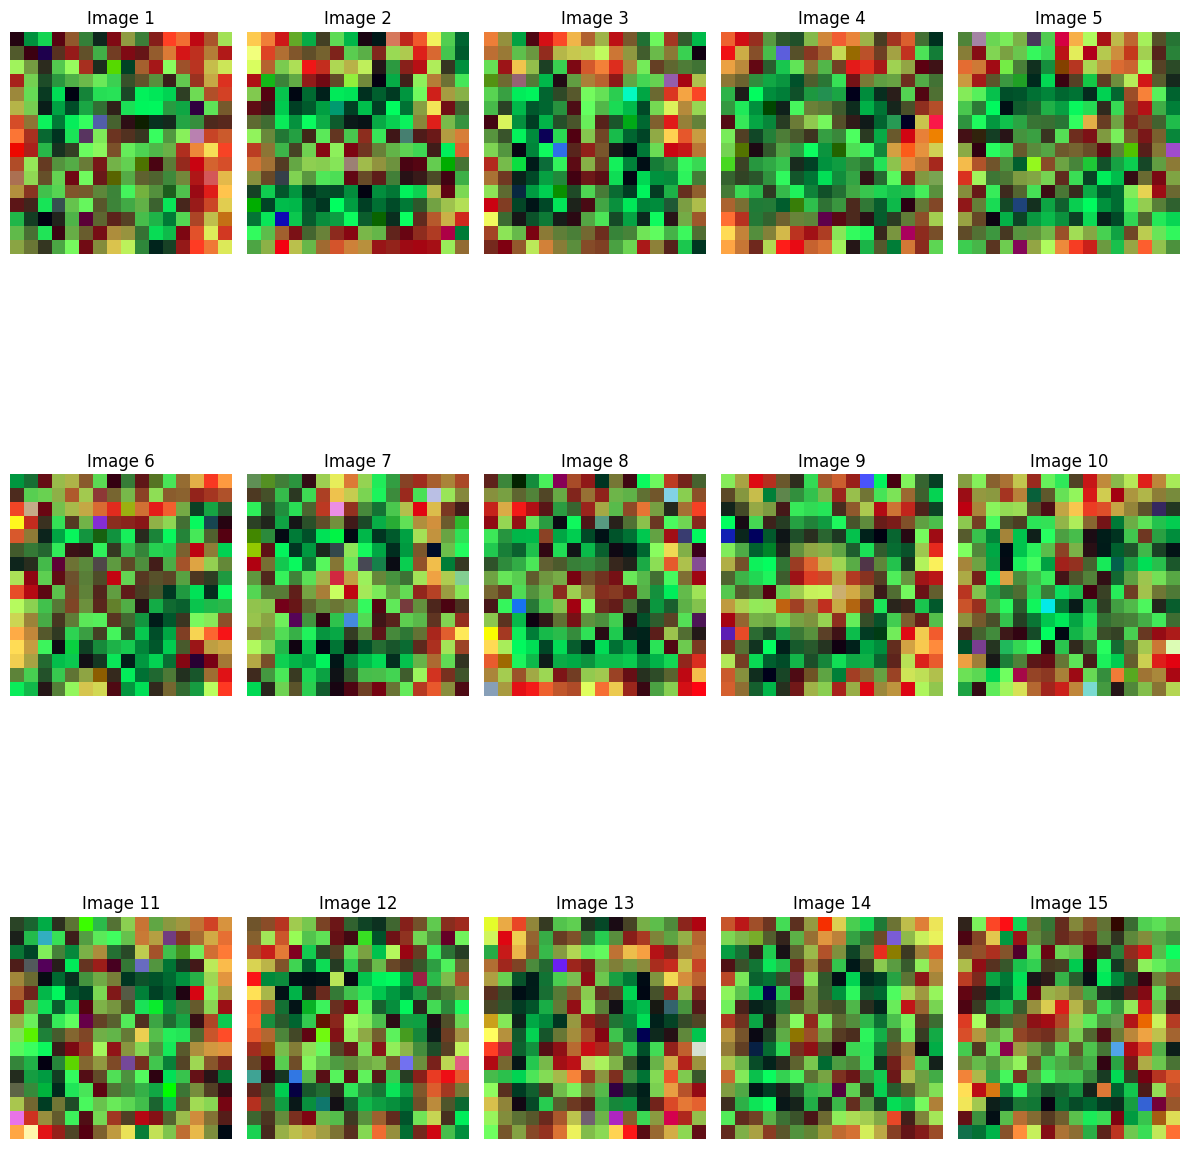

In [3]:
import matplotlib.pyplot as plt

# Display 15 images in a 5x3 grid
num_rows = 3  # Number of rows in the subplot grid
num_cols = 5  # Number of columns in the subplot grid

plt.figure(figsize=(12, 15))  # Adjust the figure size as needed

for i in range(num_rows * num_cols):
    # Extract the ith image from the array
    image = X[i]

    # Ensure the image has the correct shape
    image = np.transpose(image, (1, 2, 0))

    # Convert pixel values to uint8
    int_image = image.astype(np.uint8)

    # Add subplot to the grid
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(int_image)
    plt.axis('off')  # Turn off axis labels
    plt.title(f'Image {i + 1}')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


#### Understanding the label in the dataset

In [4]:
unique_values, counts = np.unique(y, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")
    
indices_with_label0 = np.where(y == 0.0)[0]
indices_with_label1 = np.where(y == 1.0)[0]
indices_with_label2 = np.where(y == 2.0)[0]
indices_with_labelnan = np.isnan(y)
indices_with_nan = np.where(indices_with_labelnan)[0]
print(f"Indices with label 0: {indices_with_label0[:5]}")
print(f"Indices with label 1: {indices_with_label1[:5]}")
print(f"Indices with label 2: {indices_with_label2[:5]}")
print(f"Indices with label nan: {indices_with_nan[:5]}")

y

Value: 0.0, Count: 2392
Value: 1.0, Count: 203
Value: 2.0, Count: 25
Value: nan, Count: 291
Indices with label 0: [ 2  6  8 10 11]
Indices with label 1: [ 1  4  5  7 30]
Indices with label 2: [  3   9  34  50 141]
Indices with label nan: [ 0 26 27 47 65]


array([nan,  1.,  0., ...,  0.,  0.,  0.], dtype=float16)

### Cleaning data

#### Dealing with rows where labelled as nan

In [5]:
# Assuming X is your image data and y is your label array
# Find indices where labels are not nan
valid_indices = ~np.isnan(y)

# Filter out the samples where labels are nan
X_remove_labelnan = X[valid_indices]
y_remove_labelnan = y[valid_indices]

# Check the number of remaining samples
print(f"Original number of samples: {X.shape[0]}")
print(f"Number of samples after removing nan labels: {X_remove_labelnan.shape[0]}")

label_is_nan_cleaned = np.isnan(y_remove_labelnan)
indices_with_labelnan_cleaned = np.where(label_is_nan_cleaned)[0]
print(f"Number of rows where label is nan: {indices_with_labelnan_cleaned.shape[0]}")


Original number of samples: 2911
Number of samples after removing nan labels: 2620
Number of rows where label is nan: 0


#### Dealing with rows with exceeding pixel values [0, 255]

In [6]:
# Find indices and values for pixels smaller than 0
value_less0_indices = np.where(X_remove_labelnan < 0)
value_below_0_array = X_remove_labelnan[X_remove_labelnan < 0]
print(f"There are {len(value_less0_indices)} images with RGB value lesser than 0")
print(f"RGB value lesser than 0 indices: {value_less0_indices}")
print(f"The values of the pixel which are less than 0: {value_below_0_array}")

print("----------------------------------------------------------------------------")

# Find indices and values for pixels greater than 255
value_above255_indices = np.where(X_remove_labelnan > 255)
value_above_255_array = X_remove_labelnan[X_remove_labelnan > 255]
print(f"There are {len(value_above255_indices)} images with RGB value above than 255")
print(f"RGB value more than 255 indices: {value_above255_indices}")
print(f"The values of the pixel greater than 255: {value_above_255_array}")

There are 4 images with RGB value lesser than 0
RGB value lesser than 0 indices: (array([   0,    0,    0, ..., 2619, 2619, 2619]), array([0, 0, 0, ..., 0, 1, 2]), array([ 2,  3,  7, ..., 12,  9, 14]), array([ 7,  1,  8, ...,  4, 14,  3]))
The values of the pixel which are less than 0: [-9800. -1260. -7540. ... -2356. -2476.  -357.]
----------------------------------------------------------------------------
There are 4 images with RGB value above than 255
RGB value more than 255 indices: (array([   0,    0,    0, ..., 2619, 2619, 2619]), array([0, 0, 0, ..., 1, 2, 2]), array([ 5, 10, 11, ..., 15,  1,  5]), array([14,  3, 13, ..., 12,  3, 15]))
The values of the pixel greater than 255: [9584. 2688. 3508. ... 9176. 6624. 1460.]


##### Clipping

In [7]:
# Normalize or clip pixel values to [0, 255]
# X_cleaned_exceeding_pixels = np.clip(X, 0, 255)

##### Median

In [8]:
# X_cleaned_exceeding_pixels = np.copy(X_remove_labelnan)
# # Iterate through each row of the image data and replace out-of-range values with the row's median
# for i in range(X_remove_labelnan.shape[0]):  # Loop through each image
#     for j in range(X_remove_labelnan.shape[1]):  # Loop through each color channel
#         for k in range(X_remove_labelnan.shape[2]):  # Loop through each row of the image
#             # Get the current row
#             row = X_remove_labelnan[i, j, k, :]
            
#             row_median = np.median(row)
            
#             # Find the out-of-range indices in the current row
#             out_of_range_indices = np.where((row > 255) | (row < 0))
            
#             # Replace out-of-range values with the row median
#             row[out_of_range_indices] = row_median
            
#             # Update the array with the modified row
#             X_cleaned_exceeding_pixels[i, j, k, :] = row


##### Custom cleaning (Take absolute value and divide 100)

In [9]:
out_of_range_indices = np.where((X_remove_labelnan > 255) | (X_remove_labelnan < 0))

X_cleaned_exceeding_pixels = np.copy(X_remove_labelnan)
X_cleaned_exceeding_pixels[out_of_range_indices] = np.abs(X_cleaned_exceeding_pixels[out_of_range_indices]) / 100

print(f"Results of modified pixel values: {X_cleaned_exceeding_pixels[out_of_range_indices]}")


Results of modified pixel values: [98.   12.6  95.8  ... 66.25 14.6   3.57]


##### Checking if there are pixel values exceeding [0, 255]

In [10]:
values_below_0 = np.any(X_cleaned_exceeding_pixels < 0)
values_above_255 = np.any(X_cleaned_exceeding_pixels > 255)
print("Are there still pixel values below 0 after clipping?", values_below_0)
print("Are there still pixel values above 255 after clipping?", values_above_255)

Are there still pixel values below 0 after clipping? False
Are there still pixel values above 255 after clipping? False


#### Dealing with rows with NaN pixel values

##### Remove images with NaN Values

In [11]:
# # Find the indices of images with NaN values
# nan_indices = np.where(np.isnan(X_cleaned_exceeding_pixels).any(axis=(1, 2, 3)))
# X_pixel_replaced_nan = np.delete(X_cleaned_exceeding_pixels, nan_indices, axis=0)
# X_pixel_replaced_nan = np.delete(X_cleaned_exceeding_pixels, nan_indices, axis=0)

##### Replace NaN with the Mean or Median of the Row/Column

In [12]:
# X_pixel_replaced_nan = np.copy(X_cleaned_exceeding_pixels)
# for i in range(X_pixel_replaced_nan.shape[0]):  # Loop through each image
#     for j in range(X_pixel_replaced_nan.shape[1]):  # Loop through each color channel
#         for k in range(X_pixel_replaced_nan.shape[2]):  # Loop through each row
#             row = X_pixel_replaced_nan[i, j, k, :]
#             # Replace NaN values with the row median
#             row_median = np.nanmedian(row)
#             row[np.isnan(row)] = row_median


In [13]:
# X_pixel_replaced_nan = np.copy(X_cleaned_exceeding_pixels)
# for i in range(X_pixel_replaced_nan.shape[0]):  # Loop through each image
#     for j in range(X_pixel_replaced_nan.shape[1]):  # Loop through each color channel
#         for l in range(X_pixel_replaced_nan.shape[3]):  # Loop through each column
#             col = X_pixel_replaced_nan[i, j, :, l]
#             # Replace NaN values with the column median
#             col_median = np.nanmedian(col)
#             col[np.isnan(col)] = col_median


##### Replace NaN with Interpolated Values

In [14]:
# from scipy.interpolate import griddata

# X_pixel_replaced_nan = X_cleaned_exceeding_pixels

# # Get image dimensions
# rows, cols = X_cleaned_exceeding_pixels.shape[2], X_cleaned_exceeding_pixels.shape[3]

# # Create meshgrid for interpolation
# grid_x, grid_y = np.meshgrid(np.arange(cols), np.arange(rows))

# for i in range(X_pixel_replaced_nan.shape[0]):
#     for j in range(X_pixel_replaced_nan.shape[1]):
#         image_slice = X_pixel_replaced_nan[i, j, :, :]
#         # Mask the NaNs for interpolation
#         nan_mask = np.isnan(image_slice)
#         points = np.array((grid_x[~nan_mask], grid_y[~nan_mask])).T
#         values = image_slice[~nan_mask]
#         interpolated_values = griddata(points, values, (grid_x, grid_y), method='linear')
#         # Replace NaN values with interpolated ones
#         X_pixel_replaced_nan[i, j, :, :] = np.nan_to_num(image_slice, nan=interpolated_values)

##### Replace NaN with Neighboring Pixel Values

In [15]:
import pandas as pd  # Import pandas

X_pixel_replaced_nan = X_cleaned_exceeding_pixels

for i in range(X_pixel_replaced_nan.shape[0]):
    for j in range(X_pixel_replaced_nan.shape[1]):
        image_slice = X_pixel_replaced_nan[i, j, :, :].astype(float)  # Ensure it's float for NaN handling
        # Use forward fill or backward fill
        image_slice = pd.DataFrame(image_slice).fillna(method='ffill').fillna(method='bfill').values
        X_pixel_replaced_nan[i, j, :, :] = image_slice

C:\Users\Ho Jin Han\AppData\Local\Temp\ipykernel_21368\2000270766.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  image_slice = pd.DataFrame(image_slice).fillna(method='ffill').fillna(method='bfill').values


##### Checking the existence of NaN values in image

In [16]:
print(f'There are a total of {np.sum(np.isnan(X_pixel_replaced_nan))} NaNs in X')

There are a total of 0 NaNs in X


### Resampling

In [17]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pixel_replaced_nan.reshape(X_pixel_replaced_nan.shape[0], -1), y_remove_labelnan)  # Flatten images if needed
X_resampled = X_resampled.reshape(-1, X_pixel_replaced_nan.shape[1], X_pixel_replaced_nan.shape[2], X_pixel_replaced_nan.shape[3])  # Reshape back to original form


### Splitting data

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pixel_replaced_nan, y_remove_labelnan, test_size=0.2, random_state=32)
# 20% used for testing, 80% used for training

In [19]:
import torch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

### Prepare the machine learning model

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        # After two pooling layers, the feature map size is reduced
        self.fc1 = nn.Linear(32 * 4 * 4, 256)  # Adjust dimensions based on the output size
        self.fc2 = nn.Linear(256, 64)
        self.out = nn.Linear(64, 3)  # Output layer for 3 classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 4 * 4)  # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x


In [21]:
# Pick a manual seed for randomization
torch.manual_seed(32)
# Create an instance of model
model = SimpleCNN()

### Define the loss function

In [22]:
loss_fn = nn.CrossEntropyLoss()
# Choose Optimizer (here we choose Adam), lr (if error doesn't go down after a bunch of epochs, lower this)
optimizer = torch.optim.Adam(model.parameters(), lr=0.009)

## Trainng the machine learning model

In [23]:
from torch.utils.data import DataLoader, TensorDataset

y_train_tensor.shape
X_train_tensor.shape

# Convert validation data to tensors
X_val_tensor = torch.tensor(X_test, dtype=torch.float32)
y_val_tensor = torch.tensor(y_test, dtype=torch.long)

# Create a TensorDataset and DataLoader for validation set
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [24]:
# Training loop
epochs = 450
losses = []

for i in range(epochs):
    model.train()  # Set model to training mode
    
    # Forward pass
    y_pred = model(X_train_tensor)
    
    # Compute loss
    loss = loss_fn(y_pred, y_train_tensor)
    
    # Keep track of losses
    losses.append(loss.item())

    if i % 10 == 0:
        print(f'Epoch: {i} and loss: {loss.item()}')

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and loss: 2.5168497562408447
Epoch: 10 and loss: 0.4149583876132965
Epoch: 20 and loss: 0.31472697854042053
Epoch: 30 and loss: 0.3076602518558502
Epoch: 40 and loss: 0.29115501046180725
Epoch: 50 and loss: 0.2639782428741455
Epoch: 60 and loss: 0.23064500093460083
Epoch: 70 and loss: 0.2127223163843155
Epoch: 80 and loss: 0.1949126124382019
Epoch: 90 and loss: 0.17328967154026031
Epoch: 100 and loss: 0.15728941559791565
Epoch: 110 and loss: 0.15197168290615082
Epoch: 120 and loss: 0.1345536857843399
Epoch: 130 and loss: 0.11999018490314484
Epoch: 140 and loss: 0.1141929104924202
Epoch: 150 and loss: 0.11336340010166168
Epoch: 160 and loss: 0.10090909153223038
Epoch: 170 and loss: 0.09003601223230362
Epoch: 180 and loss: 0.07638178765773773
Epoch: 190 and loss: 0.06869349628686905
Epoch: 200 and loss: 0.19692370295524597
Epoch: 210 and loss: 0.12866254150867462
Epoch: 220 and loss: 0.1008402407169342
Epoch: 230 and loss: 0.08961425721645355
Epoch: 240 and loss: 0.0777646750211

### Graph lost for the training period

Text(0.5, 0, 'Epoch')

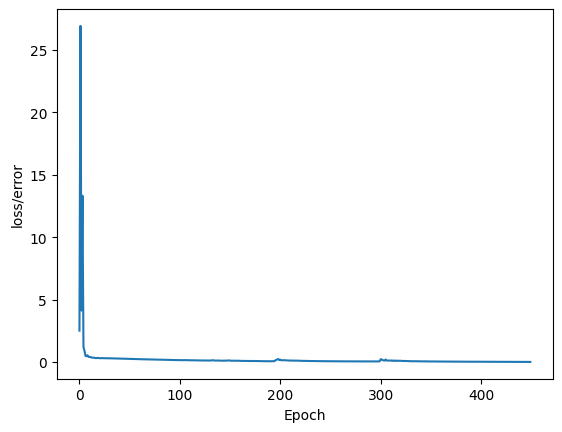

In [25]:
# Graph it out!
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")

## Evaluation of machine learning model

In [26]:
from sklearn.metrics import f1_score

# Validation loop
model.eval()
y_pred = []  # List to store predictions
with torch.no_grad():
    val_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in val_loader:
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        val_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.tolist())  # Extend the list with batch predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate F1 Score
    print("F1 Score (macro): {0:.2f}".format(f1_score(y_test, y_pred, average='macro')))
    print(y_pred)
    print(y_test)

    # Print prediction counts
    print('y_pred')
    unique_values, counts = np.unique(y_pred, return_counts=True)
    for value, count in zip(unique_values, counts):
        print(f"Value: {value}, Count: {count}")
    
    # Print ground truth counts
    print('y_test')
    unique_values, counts = np.unique(y_test, return_counts=True)
    for value, count in zip(unique_values, counts):
        print(f"Value: {value}, Count: {count}")


F1 Score (macro): 0.69
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0

In [27]:
print("Final loss: ",loss.item())

Final loss:  0.28291499614715576


## Saving and loading machine learning model

In [28]:
# Save our NN Model
torch.save(model.state_dict(), 'Neural_Network-Image_Categorization.pt' )

In [29]:
# Load the Saved Model
loaded_model_from_local_machine = SimpleCNN()
loaded_model_from_local_machine.load_state_dict(torch.load('Neural_Network-Image_Categorization.pt'))

C:\Users\Ho Jin Han\AppData\Local\Temp\ipykernel_21368\4105091293.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_from_local_machine.load_state_dict(torch.l

<All keys matched successfully>

In [30]:
# Make sure our model is loaded correctly
loaded_model_from_local_machine.eval()

SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=512, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=3, bias=True)
)